In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

#classification contunue
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#classification categorial
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

#processing classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn import metrics

import timeit


In [2]:
iris = pd.read_csv("./data/iris.csv")

#afficher les 10 premières lignes
iris.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
X = iris.drop(columns=['Id'])
y = iris["Species"]

In [4]:
# vérifier s'il y a des valeurs manquantes sur toutes les colonnes
if not pd.isnull(iris).any().any():
    print("Il n'y a pas de valeurs manquantes.")


Il n'y a pas de valeurs manquantes.


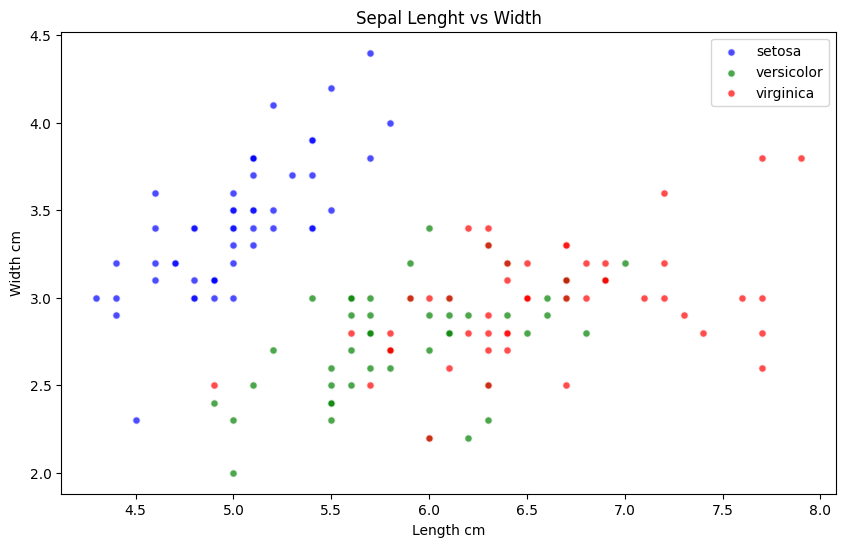

In [5]:
fig = plt.figure(figsize=(10,6))
setosa = iris[iris.Species == "Iris-setosa"] 
versicolor = iris[iris.Species == "Iris-versicolor"] 
virginica = iris[iris.Species == "Iris-virginica"] 
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], alpha=0.7, color='b', edgecolors='w', s=30, label='setosa')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], alpha=0.7, color='g', edgecolors='w', s=30, label='versicolor')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], alpha=0.7, color='r', edgecolors='w', s=30, label='virginica')
plt.title("Sepal Lenght vs Width")
plt.xlabel("Length cm")
plt.ylabel("Width cm")
plt.legend()


# Étape 5 : Afficher le graphique
plt.show()

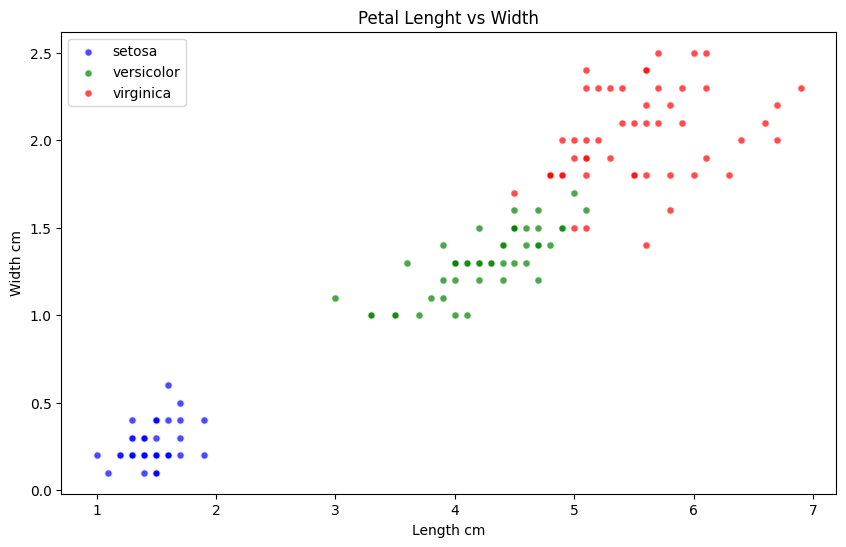

In [6]:
fig = plt.figure(figsize=(10,6))
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], alpha=0.7, color='b', edgecolors='w', s=30, label='setosa')
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], alpha=0.7, color='g', edgecolors='w', s=30, label='versicolor')
plt.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], alpha=0.7, color='r', edgecolors='w', s=30, label='virginica')
plt.title("Petal Lenght vs Width")
plt.xlabel("Length cm")
plt.ylabel("Width cm")
plt.legend()

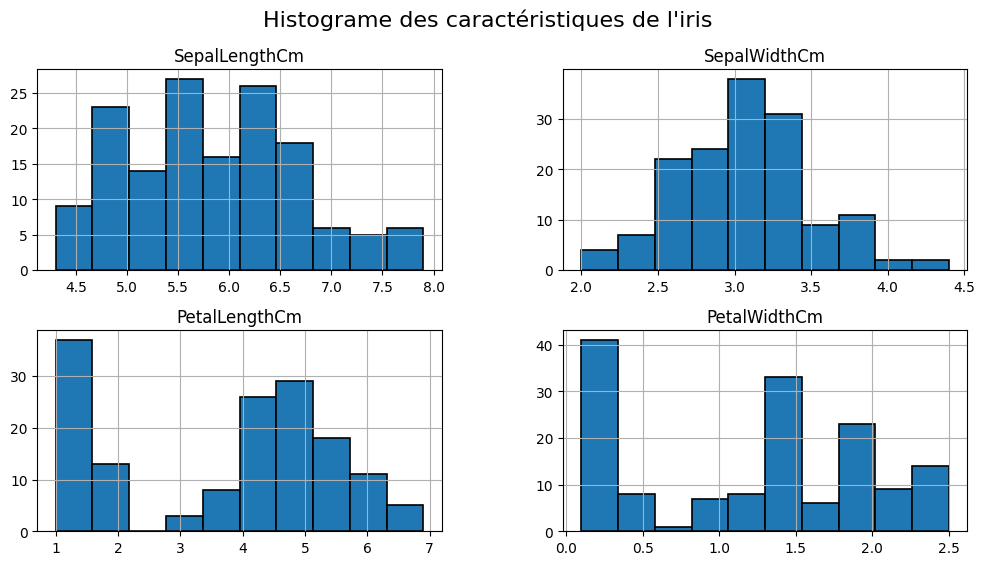

In [7]:
X.hist(edgecolor = 'Black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.suptitle("Histograme des caractéristiques de l'iris", fontsize = 16)
plt.show()

In [8]:
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

X = iris.drop(columns=['Id'])
y = iris["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,random_state=42) # pour évaluer (80% /20%)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(30, 5)
(120, 5)
(30,)
(120,)


In [9]:
execution_time = {}
precision = {}

In [10]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision["DecisionTreeClassifier"] = accuracy_score(y_test, y_pred)

In [11]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision["RandomForestClassifier"] = accuracy_score(y_test, y_pred)

In [12]:
# knn
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision["KNeighborsClassifier"] = accuracy_score(y_test, y_pred)


In [13]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision["LogisticRegression"] = accuracy_score(y_test, y_pred)

In [14]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision["GaussianNB"]  = accuracy_score(y_test, y_pred)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred, average="micro"))
print(metrics.recall_score(y_test, y_pred, average="micro"))
print(metrics.f1_score(y_test, y_pred, average="micro"))


[[43  0  0]
 [ 0 39  0]
 [ 0  0 38]]
1.0
1.0
1.0


In [15]:
# Support Vector Machine (SVM)
model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision["OneClassSVM"] = accuracy_score(y_test, y_pred)


In [16]:
precision

{'DecisionTreeClassifier': 0.9333333333333333,
 'RandomForestClassifier': 0.9833333333333333,
 'KNeighborsClassifier': 1.0,
 'LogisticRegression': 1.0,
 'GaussianNB': 1.0,
 'OneClassSVM': 1.0}